In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('C:/Users/mkkma/Downloads/Final_PA2_data.CSV')
df.head()

,id,keyword,location,target,lemmatize_without_stopwords
0,1,NaN,NaN,1.0,deed reason earthquake may allah forgive us
1,4,NaN,NaN,1.0,forest fire near la ronge sask canada
2,5,NaN,NaN,1.0,resident ask shelter place notify officer evac...
3,6,NaN,NaN,1.0,people receive wildfire evacuation order calif...
4,7,NaN,NaN,1.0,get sent photo ruby alaska smoke wildfires pou...


In [4]:
len(df.location.unique())

4522

In [5]:
df.drop(['location','keyword'],axis = 1, inplace = True)

### Splitting the test and train

In [6]:
train = df[0:7612]
test = df[7613:10876]

In [7]:
train.head()

,id,target,lemmatize_without_stopwords
0,1,1.0,deed reason earthquake may allah forgive us
1,4,1.0,forest fire near la ronge sask canada
2,5,1.0,resident ask shelter place notify officer evac...
3,6,1.0,people receive wildfire evacuation order calif...
4,7,1.0,get sent photo ruby alaska smoke wildfires pou...


In [8]:
train = shuffle(train)

In [9]:
train.target.sum()

3270.0

### No class imbalance problem

In [10]:
# max len 
max(train['lemmatize_without_stopwords'].str.split().str.len())

23

In [11]:
# Creating a validation set
X = train['lemmatize_without_stopwords']
Y = train['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [12]:
max_words = 15000
max_len =23
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [13]:
sequences_matrix

array([[    0,     0,     0, ...,   902,   519,  3309],
       [    0,     0,     0, ...,   235,   604,   141],
       [    0,     0,     0, ...,     1,   202,   202],
       ...,
       [    0,     0,     0, ...,   765,   197,   215],
       [    0,     0,     0, ...,   814,   159,   984],
       [    0,     0,     0, ...,   436, 13489,  4292]])

In [13]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [54]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64,kernel_initializer='random_uniform',)(layer)
    layer = Dense(256,name='FC1',kernel_initializer='random_uniform',)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [55]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.0001),metrics=['accuracy'])

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_25 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_25 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_49 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

In [56]:
# Function to show the loss plot of training and validation set
def loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Train on 6470 samples, validate on 1142 samples
Epoch 1/20
6470/6470 [==============================] - 4s 568us/step - loss: 0.6898 - accuracy: 0.5699 - val_loss: 0.6862 - val_accuracy: 0.5595
Epoch 2/20
6470/6470 [==============================] - 3s 408us/step - loss: 0.6796 - accuracy: 0.5723 - val_loss: 0.6801 - val_accuracy: 0.5595
Epoch 3/20
6470/6470 [==============================] - 3s 410us/step - loss: 0.6732 - accuracy: 0.5723 - val_loss: 0.6748 - val_accuracy: 0.5595
Epoch 4/20
6470/6470 [==============================] - 3s 412us/step - loss: 0.6639 - accuracy: 0.5723 - val_loss: 0.6662 - val_accuracy: 0.5595
Epoch 5/20
6470/6470 [==============================] - 3s 425us/step - loss: 0.6469 - accuracy: 0.5869 - val_loss: 0.6508 - val_accuracy: 0.5858
Epoch 6/20
6470/6470 [==============================] - 3s 397us/step - loss: 0.6196 - accuracy: 0.6648 - val_loss: 0.6286 - val_accuracy: 0.6550
Epoch 7/20
6470/6470 [==============================] - 3s 392us/step - loss

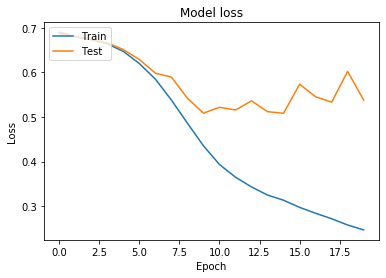

In [57]:
lstm_model =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

### From this loss plot it appears epoch = 15 is the best 

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_26 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_26 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_51 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

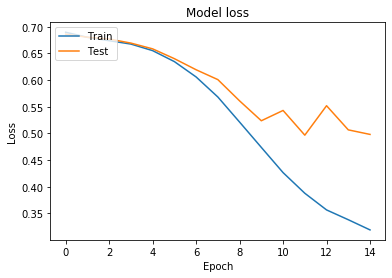

In [58]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.0001),metrics=['accuracy'])
lstm_model =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=15,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

In [59]:
accr = model.evaluate(test_sequences_matrix,Y_test)

1142/1142 [==============================] - 0s 146us/step


In [60]:
accr

[0.4980940008748016, 0.7845884561538696]

In [61]:
Y_pred = model.predict(test_sequences_matrix)
Y_pred = [1 if i>0.5 else 0 for i in Y_pred]

In [62]:
f1_score(Y_test, Y_pred, average='micro')

0.7845884413309984

In [ ]:
### Finding 10-fold CV error


In [68]:
cv_data = pd.read_csv('C:/Users/mkkma/Downloads/data_final.csv')
cv_data.head()

,Unnamed: 0,id,keyword,location,target,lemmatize_without_stopwords,fold
0,0,1,NaN,NaN,1.0,deed reason earthquake may allah forgive us,9
1,1,4,NaN,NaN,1.0,forest fire near la ronge sask canada,4
2,2,5,NaN,NaN,1.0,resident ask shelter place notify officer evac...,2
3,3,6,NaN,NaN,1.0,people receive wildfire evacuation order calif...,7
4,4,7,NaN,NaN,1.0,get sent photo ruby alaska smoke wildfires pou...,1


Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_53 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_53 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_105 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

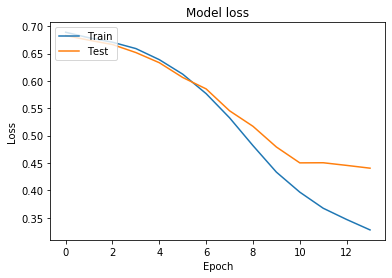

Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_54 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_54 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_107 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

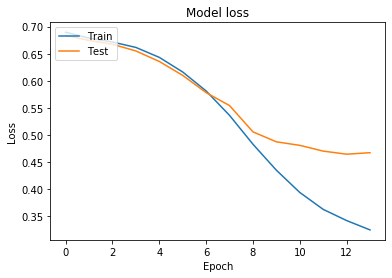

Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_55 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_55 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_109 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

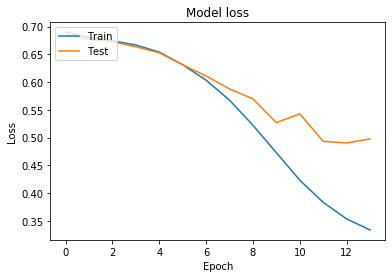

Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_56 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_56 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_111 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

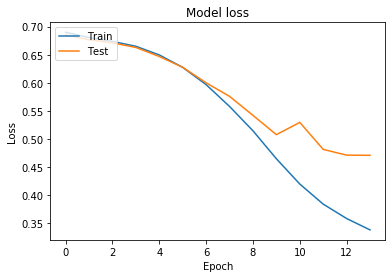

Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_57 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_57 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_113 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

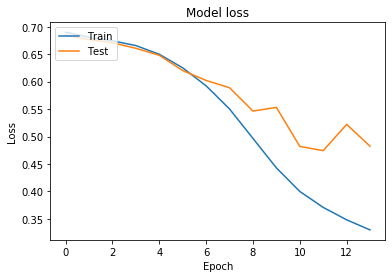

Model: "model_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_58 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_58 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_115 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

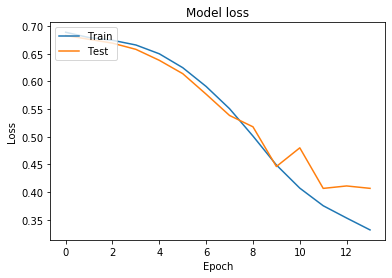

Model: "model_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_59 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_59 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_117 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

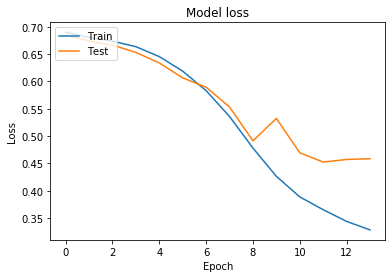

Model: "model_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_60 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_60 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_119 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

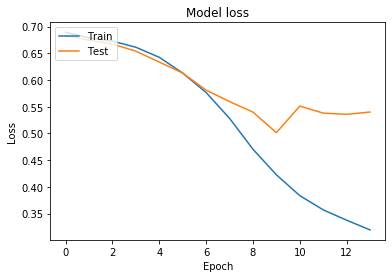

Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_61 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_61 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_121 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

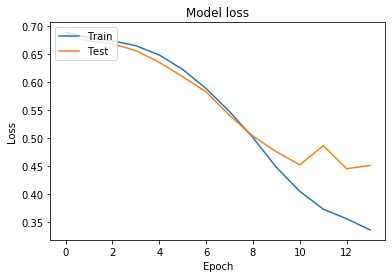

Model: "model_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_62 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_62 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_123 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

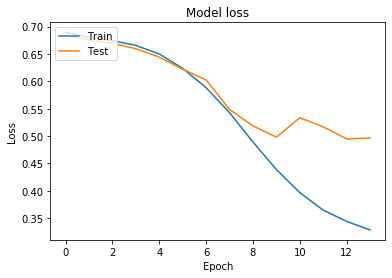

In [82]:
cv_scores = []
for i in range(1,11):
    train = cv_data[cv_data['fold'] != i]
    test = cv_data[cv_data['fold'] == i]
    max_words = 15000
    max_len =23
    X_train = train['lemmatize_without_stopwords']
    Y_train = train['target']
    X_test = test['lemmatize_without_stopwords']
    Y_test = test['target']
    tok = Tokenizer(num_words=max_words)
    tok.fit_on_texts(X_train)
    sequences = tok.texts_to_sequences(X_train)
    sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
    test_sequences = tok.texts_to_sequences(X_test)
    test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
    model = RNN()
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.0001),metrics=['accuracy'])
    lstm_model =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=14,validation_data=(test_sequences_matrix, Y_test))
    loss(lstm_model)
    Y_pred = model.predict(test_sequences_matrix)
    Y_pred = [1 if i>0.5 else 0 for i in Y_pred]
    cv_scores.append(f1_score(Y_test, Y_pred, average='micro'))
    


In [83]:
sum(cv_scores)/10

0.799262436150803

### A learning rate decay might improve the performance

In [25]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.0001),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 23, 50)            750000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [26]:
# Running this model for 6 epochs
lstm_model =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=6,validation_data=(test_sequences_matrix, Y_test))

Train on 6470 samples, validate on 1142 samples
Epoch 1/6
6470/6470 [==============================] - 1s 228us/step - loss: 0.6893 - accuracy: 0.5685 - val_loss: 0.6857 - val_accuracy: 0.5595
Epoch 2/6
6470/6470 [==============================] - 1s 196us/step - loss: 0.6787 - accuracy: 0.5723 - val_loss: 0.6781 - val_accuracy: 0.5595
Epoch 3/6
6470/6470 [==============================] - 1s 181us/step - loss: 0.6702 - accuracy: 0.5723 - val_loss: 0.6719 - val_accuracy: 0.5595
Epoch 4/6
6470/6470 [==============================] - 1s 171us/step - loss: 0.6574 - accuracy: 0.5760 - val_loss: 0.6614 - val_accuracy: 0.5665
Epoch 5/6
6470/6470 [==============================] - 1s 173us/step - loss: 0.6377 - accuracy: 0.6338 - val_loss: 0.6384 - val_accuracy: 0.6594
Epoch 6/6
6470/6470 [==============================] - 1s 172us/step - loss: 0.6104 - accuracy: 0.7107 - val_loss: 0.6359 - val_accuracy: 0.6532


In [27]:
# Decaying the learning rate using a step wise decay 
model2 = RNN()
model2.summary()
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.00005),metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 23, 50)            750000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [30]:
model2.set_weights(model.get_weights())

Train on 6470 samples, validate on 1142 samples
Epoch 1/15
6470/6470 [==============================] - 1s 217us/step - loss: 0.5854 - accuracy: 0.7391 - val_loss: 0.6096 - val_accuracy: 0.6909
Epoch 2/15
6470/6470 [==============================] - 1s 187us/step - loss: 0.5641 - accuracy: 0.7604 - val_loss: 0.5926 - val_accuracy: 0.7058
Epoch 3/15
6470/6470 [==============================] - 1s 183us/step - loss: 0.5403 - accuracy: 0.7818 - val_loss: 0.5787 - val_accuracy: 0.7172
Epoch 4/15
6470/6470 [==============================] - 1s 181us/step - loss: 0.5115 - accuracy: 0.7918 - val_loss: 0.5525 - val_accuracy: 0.7408
Epoch 5/15
6470/6470 [==============================] - 1s 171us/step - loss: 0.4827 - accuracy: 0.8026 - val_loss: 0.5380 - val_accuracy: 0.7399
Epoch 6/15
6470/6470 [==============================] - 1s 171us/step - loss: 0.4554 - accuracy: 0.8150 - val_loss: 0.5252 - val_accuracy: 0.7399
Epoch 7/15
6470/6470 [==============================] - 1s 172us/step - loss

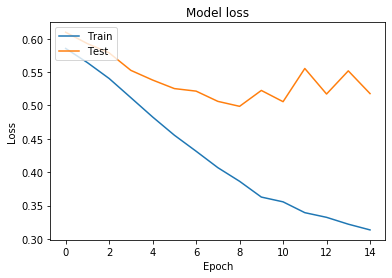

In [31]:
lstm_model =model2.fit(sequences_matrix,Y_train,batch_size=128,epochs=15,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 23, 50)            750000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

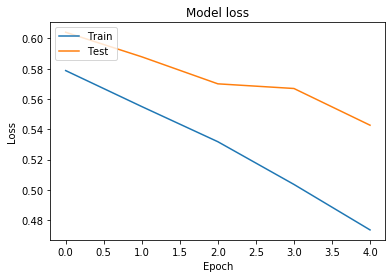

In [32]:
# Noise can be seen again after 5 epochs. So running on this learning rate for 5 epochs
# Decaying the learning rate using a step wise decay 
model2 = RNN()
model2.summary()
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.00005),metrics=['accuracy'])
model2.set_weights(model.get_weights())
lstm_model =model2.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 23, 50)            750000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

Epoch 47/50
6470/6470 [==============================] - 1s 187us/step - loss: 0.3057 - accuracy: 0.8794 - val_loss: 0.5344 - val_accuracy: 0.7715
Epoch 48/50
6470/6470 [==============================] - 1s 196us/step - loss: 0.3034 - accuracy: 0.8816 - val_loss: 0.5201 - val_accuracy: 0.7802
Epoch 49/50
6470/6470 [==============================] - 1s 189us/step - loss: 0.3015 - accuracy: 0.8816 - val_loss: 0.5154 - val_accuracy: 0.7758
Epoch 50/50
6470/6470 [==============================] - 1s 179us/step - loss: 0.2977 - accuracy: 0.8827 - val_loss: 0.5341 - val_accuracy: 0.7758


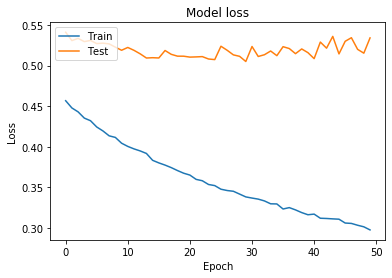

In [34]:
# Decaying the learning rate using a step wise decay 
model3 = RNN()
model3.summary()
model3.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.00001),metrics=['accuracy'])
model3.set_weights(model2.get_weights())
lstm_model =model3.fit(sequences_matrix,Y_train,batch_size=128,epochs=50,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 23, 50)            750000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

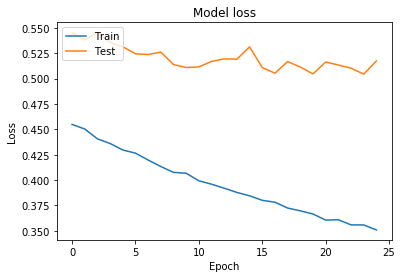

In [35]:
# The loss again sees noise after 25 epochs
# Training on 25 epochs and agian decaying the learning rate
model3 = RNN()
model3.summary()
model3.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.00001),metrics=['accuracy'])
model3.set_weights(model2.get_weights())
lstm_model =model3.fit(sequences_matrix,Y_train,batch_size=128,epochs=25,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

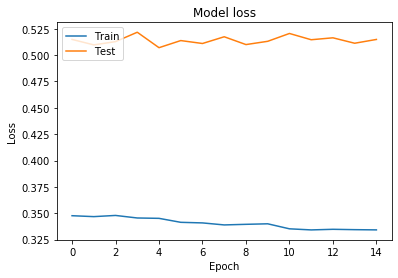

In [38]:
# Training on 15 epochs and agian decaying the learning rate
model4 = RNN()
model4.summary()
model4.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.000005),metrics=['accuracy'])
model4.set_weights(model3.get_weights())
lstm_model =model4.fit(sequences_matrix,Y_train,batch_size=128,epochs=15,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

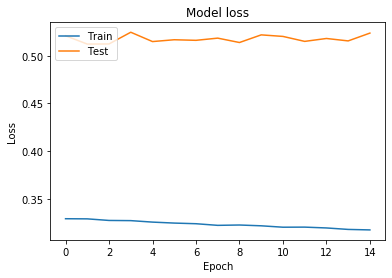

In [39]:
# Training on 25 epochs and agian decaying the learning rate
model5 = RNN()
model5.summary()
model5.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.000001),metrics=['accuracy'])
model5.set_weights(model4.get_weights())
lstm_model =model4.fit(sequences_matrix,Y_train,batch_size=128,epochs=15,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

In [66]:
# The step wise learning rate does not seem to perform efficiently. The loss is hovering arounnd the minima of the loss function or is trapped in a local minima
# Will be using exponential decay
# Training on 25 epochs and agian decaying the learning rate
model6 = RNN()
model6.summary()
model6.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.005,decay=0.3),metrics=['accuracy'])
lstm_model =model6.fit(sequences_matrix,Y_train,batch_size=128,epochs=100,validation_data=(test_sequences_matrix, Y_test))
loss(lstm_model)

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 23)                0         
_________________________________________________________________
embedding_30 (Embedding)     (None, 23, 50)            750000    
_________________________________________________________________
lstm_30 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_59 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

KeyboardInterrupt: 